In [28]:
import pandas as pd
import torch
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable

In [4]:
train = pd.read_csv('train_set.csv')

In [5]:
train.shape

(7388, 2)

In [6]:
train.head()

,Image,Id
0,72c4a059.jpg,w_d36f58c
1,22374612.jpg,w_4b95330
2,eda73a5f.jpg,w_b280692
3,526e9af7.jpg,w_55b1d69
4,73e81ae9.jpg,new_whale


#### Test how the model works

In [77]:
test_im = train.Image[15]

In [78]:
image = Image.open('train/'+test_im)

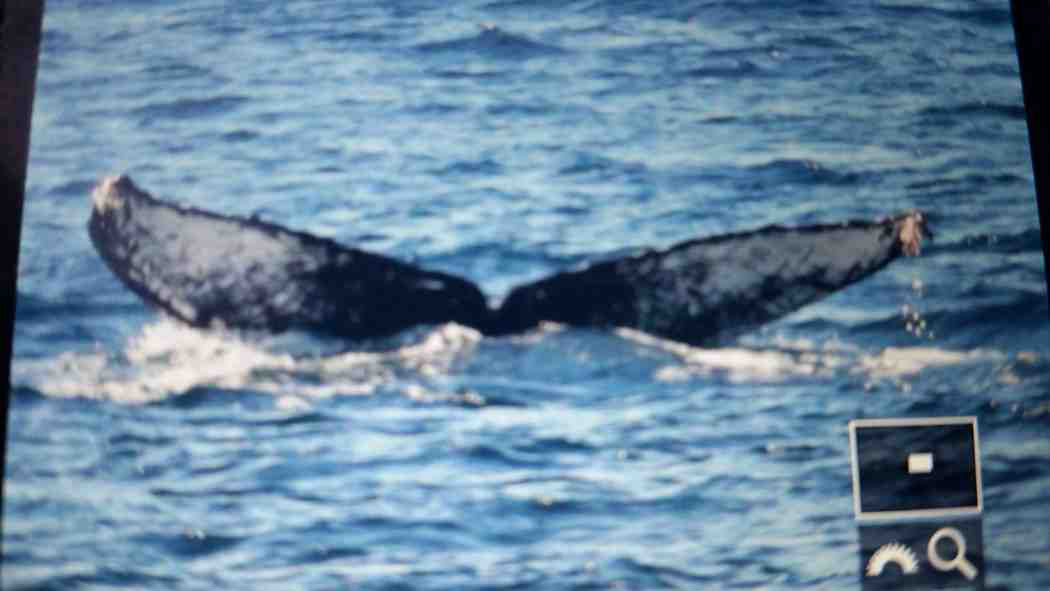

In [79]:
image

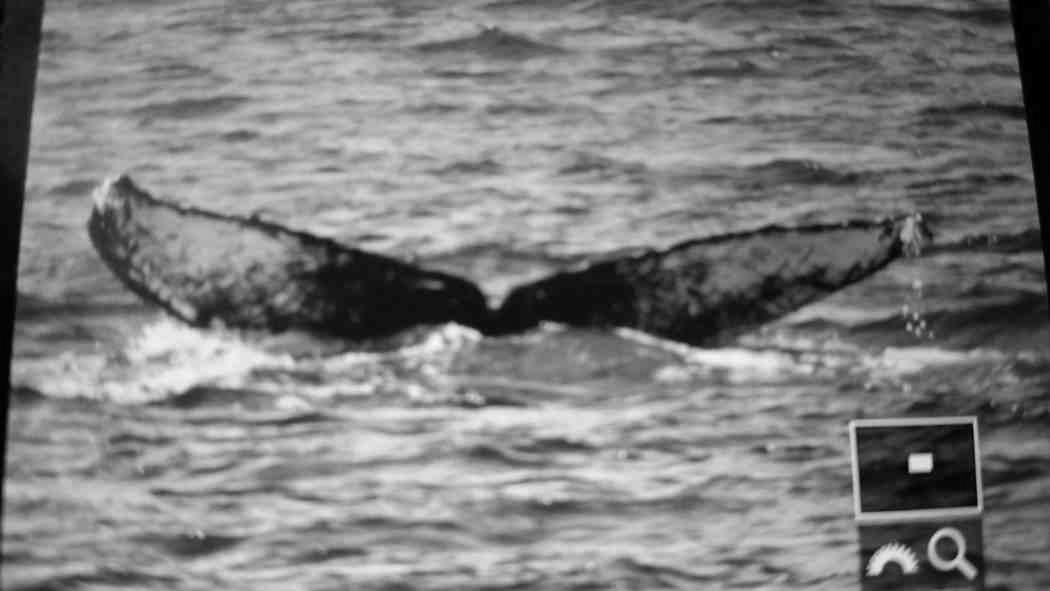

In [80]:
image.convert('L')

In [35]:
normalize = transforms.Normalize(
   mean=[0.5, 0.5, 0.5],
   std=[0.5, 0.5, 0.5])

preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [36]:
#Preprocess image
img_tensor = preprocess(image)
img_tensor.unsqueeze_(0)

tensor([[[[ 0.3961,  0.3490,  0.4902,  ...,  0.3255,  0.1843,  0.1843],
          [-0.0196,  0.0275,  0.2627,  ...,  0.3647,  0.2627,  0.2549],
          [-0.3176, -0.2706, -0.0902,  ...,  0.3882,  0.4196,  0.4353],
          ...,
          [ 0.0196, -0.0039, -0.0980,  ..., -0.1294, -0.2471, -0.4039],
          [-0.0275, -0.2078, -0.3020,  ..., -0.2863, -0.3569, -0.4745],
          [ 0.0039, -0.1059, -0.1529,  ..., -0.4745, -0.4824, -0.4745]],

         [[ 0.3961,  0.3490,  0.4902,  ...,  0.3255,  0.1843,  0.1843],
          [-0.0196,  0.0275,  0.2627,  ...,  0.3647,  0.2627,  0.2549],
          [-0.3176, -0.2706, -0.0902,  ...,  0.3882,  0.4196,  0.4353],
          ...,
          [ 0.0196, -0.0039, -0.0980,  ..., -0.1294, -0.2471, -0.4039],
          [-0.0275, -0.2078, -0.3020,  ..., -0.2863, -0.3569, -0.4745],
          [ 0.0039, -0.1059, -0.1529,  ..., -0.4745, -0.4824, -0.4745]],

         [[ 0.3961,  0.3490,  0.4902,  ...,  0.3255,  0.1843,  0.1843],
          [-0.0196,  0.0275,  

In [30]:
#Run forward pass
img_variable = Variable(img_tensor)
squeeze = models.squeezenet1_1(pretrained=True)
fc_out = squeeze(img_variable)

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /Users/ksenia/.torch/models/squeezenet1_1-f364aa15.pth
100%|██████████| 4966400/4966400 [00:00<00:00, 13952086.95it/s]


In [31]:
fc_out.data.numpy().argmax()

5

#### Test on the dataset

In [39]:
#Load and preprocess images
image_list = train.Image

In [74]:
#Load list of images
#Convert them to black and white and 
train_images = []

for image in image_list:
    item = Image.open('train/'+image)
    item.convert('L')
    train_images.append(preprocess(item))
    item.close()

In [76]:
train_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x700 at 0x116F74BE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x450 at 0x116F74C50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x700 at 0x116F74CF8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x700 at 0x116F74DA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x600 at 0x116F74E48>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x232 at 0x116F74EF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1050x600 at 0x116F74F98>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x350 at 0x122EC4D30>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x338 at 0x122EC40B8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x530 at 0x122EC4160>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1050x577 at 0x122EC4208>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=987x391 at 0x122EC42B0>,
 <PIL.JpegImagePlug

In [75]:
#Determine color channels for each image

channels = []

for image in image_list:
    channels.append(image.mode)

AttributeError: 'str' object has no attribute 'mode'

In [45]:
labels = train.Id

In [ ]:
#Define convolutional neural network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()